# Descriptive statistics/data analysis for the dataset images and labels

## Imports, boilerplate and function definitions

In [6]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#function definitions
def create_dataloader(image_folder_path, batch_size=1):
    transform = transforms.Compose([
        transforms.ToTensor(),      
    ])

    dataset = datasets.ImageFolder(root=image_folder_path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

    return dataloader
def calculate_mean_and_variance(images):
    
    red_channel = images[:, 0, :, :]
    green_channel = images[:, 1, :, :]
    blue_channel = images[:, 2, :, :]
    
    # calculate mean and variance for each channel
    means = {
        'red_mean': np.mean(red_channel),
        'green_mean': np.mean(green_channel),
        'blue_mean': np.mean(blue_channel)
    }
    
    variances = {
        'red_variance': np.var(red_channel),
        'green_variance': np.var(green_channel),
        'blue_variance': np.var(blue_channel)
    }
    
    results = {**means, **variances}
    
    return results


def descriptive_stats(images, labels):
    images_by_labels = [[],[],[],[]]
    for img,label in zip(images, labels):
        images_by_labels[label].append(img)
    
    results = []
    for n in range(4):
        imgs = np.array(images_by_labels[n])
        res = calculate_mean_and_variance(imgs)
        results.append(res)
    
    return results

## Train+validation set descriptive statistics

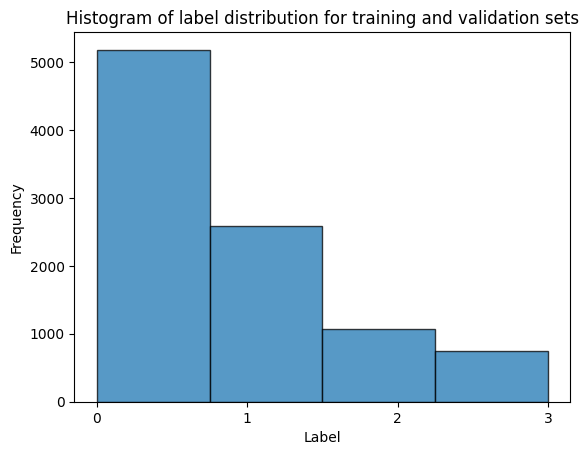

Mean and variance for each color channel for train+validation set images with label 0
Red channel mean, variance: 0.40007197856903076, 0.08481010049581528
Green channel mean, variance: 0.28848394751548767, 0.049910884350538254
Blue channel mean, variance: 0.21155521273612976, 0.031532060354948044
--------------
Mean and variance for each color channel for train+validation set images with label 1
Red channel mean, variance: 0.4262133240699768, 0.09160757809877396
Green channel mean, variance: 0.28570786118507385, 0.04693523421883583
Blue channel mean, variance: 0.22240641713142395, 0.030954711139202118
--------------
Mean and variance for each color channel for train+validation set images with label 2
Red channel mean, variance: 0.43919602036476135, 0.09707878530025482
Green channel mean, variance: 0.28969672322273254, 0.04837982729077339
Blue channel mean, variance: 0.23180826008319855, 0.033034175634384155
--------------
Mean and variance for each color channel for train+validation se

In [7]:

loader = create_dataloader('./data/train_and_validation_sets')

images = []
labels = []

for image, label in loader:
    images.append(image.numpy()[0])
    labels.append(label.numpy()[0])

images = np.array(images)
labels = np.array(labels)

stats = descriptive_stats(images, labels) 
plt.hist(labels, bins=4, range=(0, 3), alpha=0.75, edgecolor='black', align='mid')
plt.title('Histogram of label distribution for training and validation sets')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3])

plt.show()
for n in range(4):
    results = stats[n]
    print(f'Mean and variance for each color channel for train+validation set images with label {n}')
    print(f'Red channel mean, variance: {results["red_mean"]}, {results["red_variance"]}')
    print(f'Green channel mean, variance: {results["green_mean"]}, {results["green_variance"]}')
    print(f'Blue channel mean, variance: {results["blue_mean"]}, {results["blue_variance"]}')
    print('--------------')

## Test set descriptive statistics

----------------------


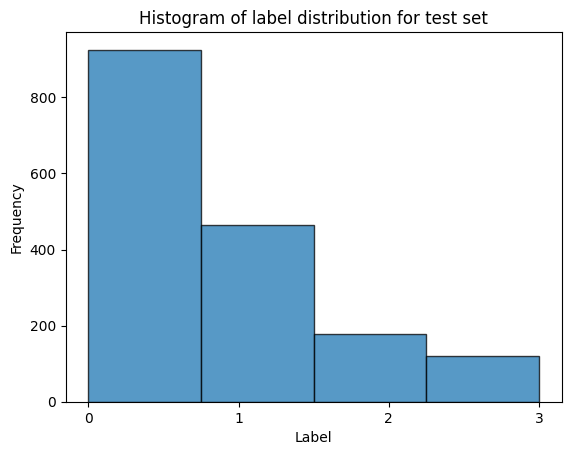

Mean and variance for each color channel for test set images with label 0
Red channel mean, variance: 0.3947645425796509, 0.0837768018245697
Green channel mean, variance: 0.28376883268356323, 0.04912382364273071
Blue channel mean, variance: 0.20523597300052643, 0.030526787042617798
--------------
Mean and variance for each color channel for test set images with label 1
Red channel mean, variance: 0.43299412727355957, 0.09444798529148102
Green channel mean, variance: 0.29323771595954895, 0.04977555572986603
Blue channel mean, variance: 0.2255791276693344, 0.03158026188611984
--------------
Mean and variance for each color channel for test set images with label 2
Red channel mean, variance: 0.4318290650844574, 0.09395169466733932
Green channel mean, variance: 0.2867152988910675, 0.046732328832149506
Blue channel mean, variance: 0.23350101709365845, 0.03211725130677223
--------------
Mean and variance for each color channel for test set images with label 3
Red channel mean, variance: 0.43

In [8]:

print('----------------------')
loader = create_dataloader('./data/test_set')

images = []
labels = []

for image, label in loader:
    images.append(image.numpy()[0])
    labels.append(label.numpy()[0])

images = np.array(images)
labels = np.array(labels)

stats = descriptive_stats(images, labels) 

plt.hist(labels, bins=4, range=(0, 3), alpha=0.75, edgecolor='black', align='mid')
plt.title('Histogram of label distribution for test set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3])
plt.show()
for n in range(4):
    results = stats[n]
    print(f'Mean and variance for each color channel for test set images with label {n}')
    print(f'Red channel mean, variance: {results["red_mean"]}, {results["red_variance"]}')
    print(f'Green channel mean, variance: {results["green_mean"]}, {results["green_variance"]}')
    print(f'Blue channel mean, variance: {results["blue_mean"]}, {results["blue_variance"]}')
    print('--------------')